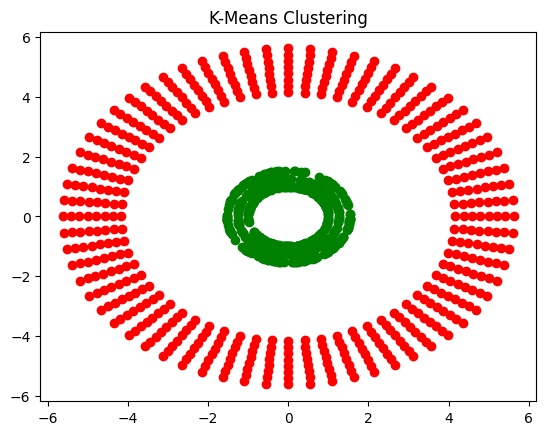

In [36]:
#Using Hand-crafted Features
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(location):
    data = np.genfromtxt(location + '/kmeans_data.txt', delimiter='  ')
    return data

def assign_clusters(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        diff = data - centroids[i, :].reshape((1, -1))
        distances[:, i] = np.sum(np.square(diff), axis=1)
    clusters = np.argmin(distances, axis=1)
    return clusters.reshape(-1, 1)

def compute_centroids(data, clusters):
    centroids = np.zeros((2, data.shape[1]))
    centroids[0, :] = np.mean(data[clusters == 0], axis=0)
    centroids[1, :] = np.mean(data[clusters == 1], axis=0)
    return centroids

def visualize_clusters(data, clusters):
    positive = (clusters == 1).reshape(clusters.shape[0])
    negative = (clusters == 0).reshape(clusters.shape[0])

    plt.scatter(data[positive, 0], data[positive, 1], c='r')
    plt.scatter(data[negative, 0], data[negative, 1], c='g')
    plt.title('K-Means Clustering')
    plt.show()

dataset = load_dataset('data')
transformed_data = (np.sum(np.square(dataset), axis=1)).reshape(-1, 1)

initial_centroids = transformed_data[:2, :]
assigned_clusters = assign_clusters(transformed_data, initial_centroids)

for _ in range(10):
    refined_centroids = compute_centroids(transformed_data, assigned_clusters)
    assigned_clusters = assign_clusters(transformed_data, refined_centroids)

visualize_clusters(dataset, assigned_clusters)


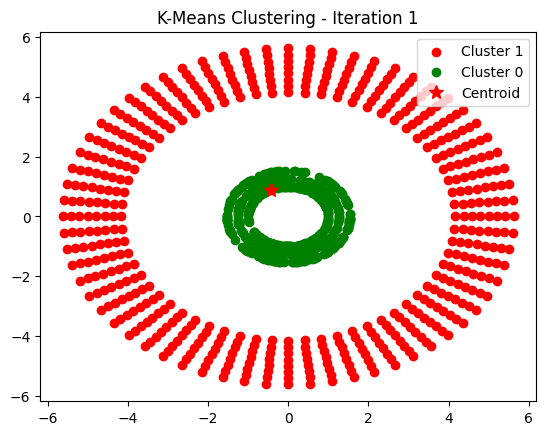

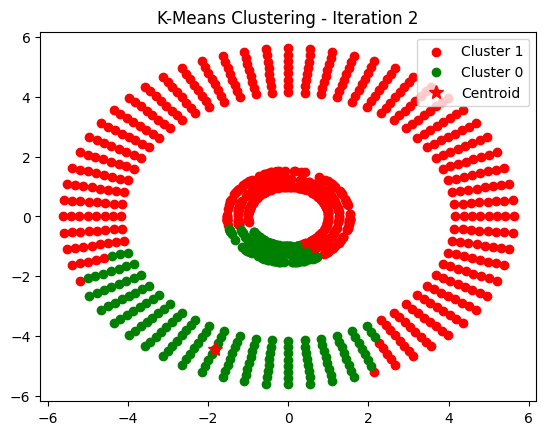

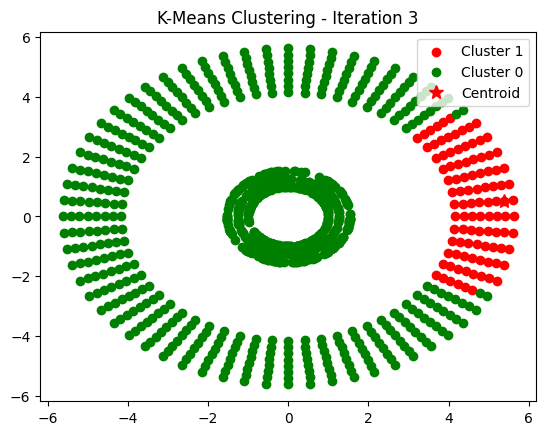

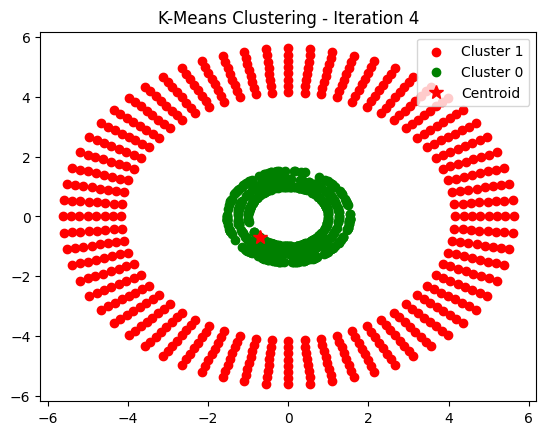

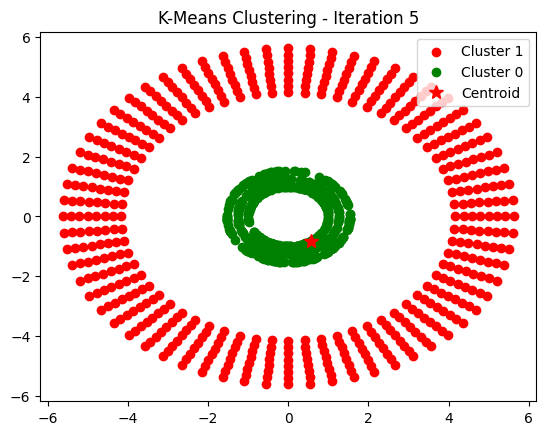

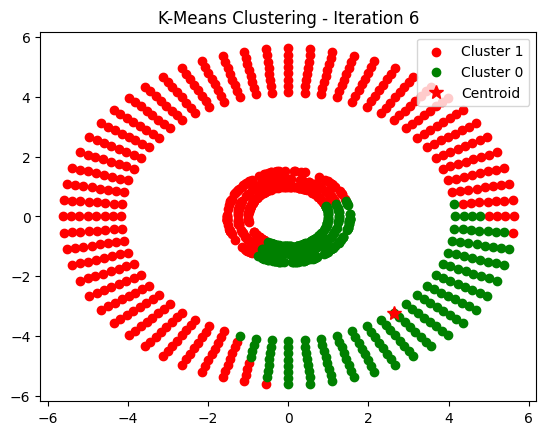

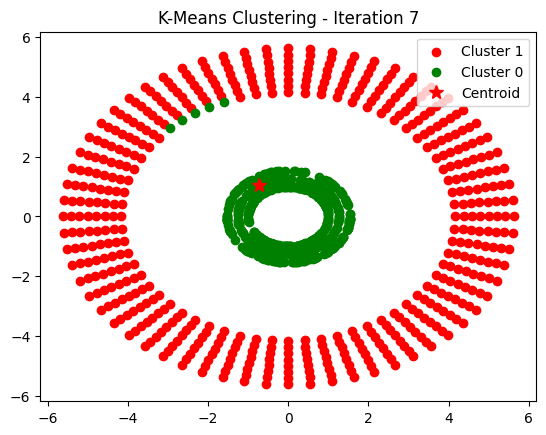

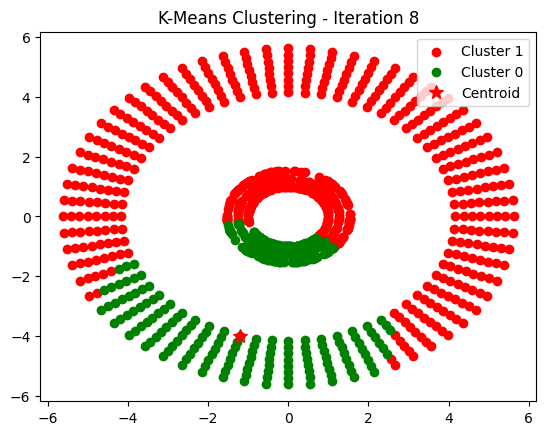

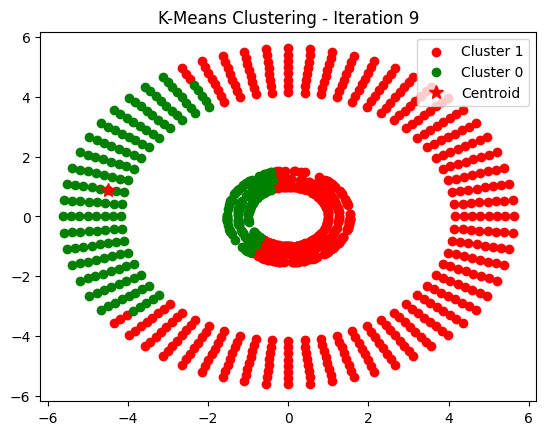

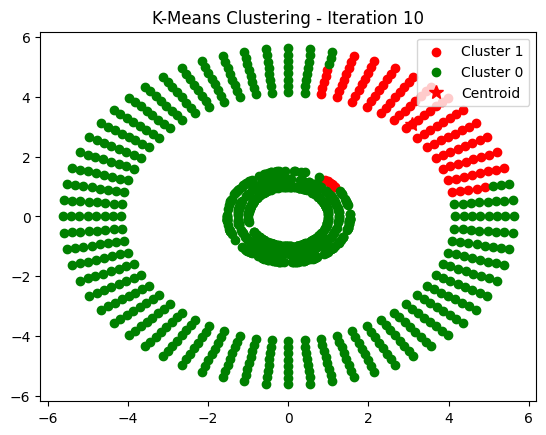

In [37]:
#Using Kernels
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(location):
    data = np.genfromtxt(location+'/kmeans_data.txt', delimiter='  ')
    return data

def generate_landmark_features(data, centroid):
    return np.exp(-0.1 * np.sum(np.square(data - centroid.reshape((1, -1))), axis=1)).reshape(-1, 1)

def assign_clusters(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        diff = data - centroids[i, :].reshape((1, -1))
        distances[:, i] = np.sum(np.square(diff), axis=1)
    clusters = np.argmin(distances, axis=1)
    return clusters.reshape(-1, 1)

def calculate_updated_centroids(data, clusters):
    updated_centroids = np.zeros((2, data.shape[1]))
    updated_centroids[0, :] = np.mean(data[clusters == 0], axis=0)
    updated_centroids[1, :] = np.mean(data[clusters == 1], axis=0)
    return updated_centroids

def plot_iteration_result(data, clusters, centroid_index, iteration):
    plt.figure(iteration)
    plt.scatter(data[clusters[:, 0] == 1, 0], data[clusters[:, 0] == 1, 1], c='r', label='Cluster 1')
    plt.scatter(data[clusters[:, 0] == 0, 0], data[clusters[:, 0] == 0, 1], c='g', label='Cluster 0')
    plt.plot(data[centroid_index, 0], data[centroid_index, 1], 'r*', markersize=10, label='Centroid')
    plt.title(f'K-Means Clustering - Iteration {iteration+1}')
    plt.legend()

data = load_dataset('data')

for iteration in range(10):
    random_centroid_index = np.random.randint(data.shape[0])
    landmarks = generate_landmark_features(data, data[random_centroid_index, :])
    centroids = landmarks[:2, :]
    clusters = assign_clusters(landmarks, centroids)
    centroids = calculate_updated_centroids(landmarks, clusters)
    clusters = assign_clusters(landmarks, centroids)
    plot_iteration_result(data, clusters, random_centroid_index, iteration)

plt.show()
